In [401]:
import tweepy       # python wrapper for twitter api
import json
import time
import requests
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# step 0, get your own twitter credentials!

In [402]:
# this is my own personal twitter api information
# if you could be so kind as to sign up yourself on both twitter and mashape that'd be great :)
# It's FREEEEEEE
api_key = 'g5uPIpw80nULQI1gfklv2zrh4'
api_secret = 'cOWvNWxYvPmEZ0ArZVeeVVvJu41QYHdUS2GpqIKtSQ1isd5PJy'
access_token = '49722956-TWl8J0aAS6KTdcbz3ppZ7NfqZEmrwmbsb9cYPNELG'
access_secret = '3eqrVssF3ppv23qyflyAto8wLEiYRA8sXEPSghuOJWTub'

In [403]:
# Documentation is your friend! http://docs.tweepy.org/en/v3.1.0/
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth) # returns a tweepy authorization handler object

In [404]:
# 1. Use Twitter API to stream and store tweets (300 per candidate)
# explain geocode is doing
bernie_tweets =  api.search(q="#berniesanders", count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#bernie', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#FeelTheBern', count=100, geocode="37.781157,-122.398720,50mi")
hillary_tweets = api.search(q='#ImWithHer', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillaryclinton', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#hillary2016', count=100, geocode="37.781157,-122.398720,50mi")
the_donald_tweets = api.search(q='#donaldtrump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump2016', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#trump', count=100, geocode="37.781157,-122.398720,50mi") + api.search(q='#makeamericagreatagain', count=100, geocode="37.781157,-122.398720,50mi")

In [405]:
the_donald_tweets[0]
bernie_tweets[0]
the_donald_tweets[0]

Status(contributors=None, truncated=False, text=u'RT @tigerbeat: Also #DonaldTrump or #TedCruz would likely reinstate the global gag rule https://t.co/EoquK8AOiJ https://t.co/4ipImEcQcc', is_quote_status=True, in_reply_to_status_id=None, id=731336125378396161, favorite_count=0, _api=<tweepy.api.API object at 0x11f2048d0>, source=u'Twitter for Android', quoted_status_id=715357950076915713, _json={u'contributors': None, u'truncated': False, u'text': u'RT @tigerbeat: Also #DonaldTrump or #TedCruz would likely reinstate the global gag rule https://t.co/EoquK8AOiJ https://t.co/4ipImEcQcc', u'is_quote_status': True, u'in_reply_to_status_id': None, u'id': 731336125378396161, u'favorite_count': 0, u'entities': {u'symbols': [], u'user_mentions': [{u'id': 29283, u'indices': [3, 13], u'id_str': u'29283', u'screen_name': u'tigerbeat', u'name': u'Steve Rhodes'}], u'hashtags': [{u'indices': [20, 32], u'text': u'DonaldTrump'}, {u'indices': [36, 44], u'text': u'TedCruz'}], u'urls': [{u'url': u'https:/

In [406]:
# wrappers come with built in python attributes and methods!
print dir(the_donald_tweets[0])

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__getattribute__', '__getstate__', '__hash__', '__init__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [407]:
print the_donald_tweets[0].created_at
print the_donald_tweets[0].text
print the_donald_tweets[0].favorite_count
print the_donald_tweets[0].favorited
print the_donald_tweets[0].lang
print the_donald_tweets[0].geo
print the_donald_tweets[0].retweet_count
print the_donald_tweets[0].retweeted
print the_donald_tweets[0].possibly_sensitive
print the_donald_tweets[0].coordinates

2016-05-14 04:11:34
RT @tigerbeat: Also #DonaldTrump or #TedCruz would likely reinstate the global gag rule https://t.co/EoquK8AOiJ https://t.co/4ipImEcQcc
0
False
en
None
1
False
False
None


In [411]:
def parse_status_objects(tweet_list, candidate, party):
    modified_tweets = list()
    for x in tweet_list:
        modified_tweets.append( [
                    x.created_at,
                    x.text,
                    x.favorite_count,
                    x.favorited,
                    x.lang,
                    x.geo,
                    x.retweet_count,
                    x.retweeted,
                    x.coordinates,
                    candidate,
                    party
                ])
    return modified_tweets
        
hillary_tweets = parse_status_objects(hillary_tweets, 0, 1)
the_donald_tweets = parse_status_objects(the_donald_tweets, 2, 0)
bernie_tweets = parse_status_objects(bernie_tweets, 1, 1)

AttributeError: 'list' object has no attribute 'created_at'

In [412]:
print the_donald_tweets[0]
print the_donald_tweets[0]
print hillary_tweets[0]

[datetime.datetime(2016, 5, 14, 4, 11, 34), u'RT @tigerbeat: Also #DonaldTrump or #TedCruz would likely reinstate the global gag rule https://t.co/EoquK8AOiJ https://t.co/4ipImEcQcc', 0, False, u'en', None, 1, False, None, 2, 0]
[datetime.datetime(2016, 5, 14, 4, 11, 34), u'RT @tigerbeat: Also #DonaldTrump or #TedCruz would likely reinstate the global gag rule https://t.co/EoquK8AOiJ https://t.co/4ipImEcQcc', 0, False, u'en', None, 1, False, None, 2, 0]
[datetime.datetime(2016, 5, 14, 4, 15, 14), u'RT @holdatpaco: #DemPrimary #CAPrimary #ImWithHer #HillaryClinton #BernedOut  https://t.co/FOsHWHREQo', 0, False, u'und', None, 2, False, None, 0, 1]


In [413]:
# 2 Create a dataframe that combines all of the tweets from each candidate
# To do so, you will need to concat the data frames
# so each row is a tweet and your columns should be 
# date, text, favorite_count,favorited, language, geocode, retweet count, retweeted, coordinates
#create there frame and then df = pd.concat(all, axis = 0)
donald = pd.DataFrame(the_donald_tweets, columns = ['date','text','favorite_count','favorited','language','geocode', 'retweet_count', 'retweeted','coordinates', 'candidate', 'party'])
bernie = pd.DataFrame(bernie_tweets, columns = ['date','text','favorite_count','favorited','language','geocode', 'retweet_count', 'retweeted','coordinates', 'candidate', 'party'])
hillary = pd.DataFrame(hillary_tweets, columns = ['date','text','favorite_count','favorited','language','geocode', 'retweet_count', 'retweeted','coordinates', 'candidate', 'party'])
frames = [donald, bernie, hillary]
result = pd.concat(frames)
result.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,candidate,party
0,2016-05-14 04:11:34,RT @tigerbeat: Also #DonaldTrump or #TedCruz w...,0,False,en,None,1,False,None,2,0
1,2016-05-14 03:32:48,@stratosathens @Merlyn43 @realDonaldTrump Also...,0,False,en,None,0,False,None,2,0
2,2016-05-14 02:15:09,"If you look at #Trump Tower on Instagram, it i...",0,False,en,None,0,False,None,2,0
3,2016-05-14 02:10:33,Maybe #DonaldTrump didn't grudge rape #IvanaTr...,1,False,en,None,0,False,None,2,0
4,2016-05-14 02:00:18,"Oh no, #DonaldTrump didnt! And what is the w...",0,False,en,None,0,False,None,2,0


In [414]:
from textblob import TextBlob, Word

In [415]:
# 3 Create a function to take in a string and output the textblob sentiment of that string
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [430]:
# 4 Add a column to your data frame called 'sentiment' which holds the sentiment of that tweet (hint: use the function from #3)
result['sentiment'] = result.text.apply(detect_sentiment)
result.tail()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,candidate,party,word count,cluster,sentiment
295,2016-05-11 16:10:34,Another beautiful day in the bay! I hear the s...,7,False,en,None,1,False,None,0,1,136,0,1
296,2016-05-11 06:41:03,RT @Melomelly2: Onward to the #OregonPrimary #...,0,False,en,None,8,False,None,0,1,135,0,0
297,2016-05-11 06:34:50,RT @Melomelly2: Onward to the #OregonPrimary #...,0,False,en,None,8,False,None,0,1,135,0,0
298,2016-05-11 05:43:24,https://t.co/GCRVdA1CB8 #Hillary2016 #imwithhe...,0,False,und,None,0,False,None,0,1,134,0,0
299,2016-05-11 04:53:53,RT @Melomelly2: Onward to the #OregonPrimary #...,0,False,en,None,8,False,None,0,1,135,0,0


In [431]:
result.head()


,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,candidate,party,word count,cluster,sentiment
0,2016-05-14 04:11:34,RT @tigerbeat: Also #DonaldTrump or #TedCruz w...,0,False,en,None,1,False,None,2,0,135,0,0.000000
1,2016-05-14 03:32:48,@stratosathens @Merlyn43 @realDonaldTrump Also...,0,False,en,None,0,False,None,2,0,108,0,0.550000
2,2016-05-14 02:15:09,"If you look at #Trump Tower on Instagram, it i...",0,False,en,None,0,False,None,2,0,135,0,0.433333
3,2016-05-14 02:10:33,Maybe #DonaldTrump didn't grudge rape #IvanaTr...,1,False,en,None,0,False,None,2,0,143,0,0.000000
4,2016-05-14 02:00:18,"Oh no, #DonaldTrump didnt! And what is the w...",0,False,en,None,0,False,None,2,0,90,0,0.000000


In [432]:
# 5 create a word count column, which holds the number of words in the text column
result['word count']= result.text.apply(len)
result.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,candidate,party,word count,cluster,sentiment
0,2016-05-14 04:11:34,RT @tigerbeat: Also #DonaldTrump or #TedCruz w...,0,False,en,None,1,False,None,2,0,135,0,0.000000
1,2016-05-14 03:32:48,@stratosathens @Merlyn43 @realDonaldTrump Also...,0,False,en,None,0,False,None,2,0,108,0,0.550000
2,2016-05-14 02:15:09,"If you look at #Trump Tower on Instagram, it i...",0,False,en,None,0,False,None,2,0,135,0,0.433333
3,2016-05-14 02:10:33,Maybe #DonaldTrump didn't grudge rape #IvanaTr...,1,False,en,None,0,False,None,2,0,143,0,0.000000
4,2016-05-14 02:00:18,"Oh no, #DonaldTrump didnt! And what is the w...",0,False,en,None,0,False,None,2,0,90,0,0.000000


In [433]:
# use countvectorizer to create a document-term matrix and concatinate it to your main dataframe
#(hint you should now have thousands of columns)
vect = CountVectorizer()
vect.fit_transform(result.text)

<997x2217 sparse matrix of type '<type 'numpy.int64'>'
	with 15934 stored elements in Compressed Sparse Row format>

In [434]:
# define X
X_clusters = result.drop(['text','favorited','language', 'geocode','retweeted','date','coordinates'], axis =1)

In [435]:
# 6 Use kmean to create clusters for the dataframe
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_clusters)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [436]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0,

In [437]:
result['cluster'] = km.labels_
result.sort('cluster')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,candidate,party,word count,cluster,sentiment
0,2016-05-14 04:11:34,RT @tigerbeat: Also #DonaldTrump or #TedCruz w...,0,False,en,None,1,False,None,2,0,135,0,0.000000
258,2016-05-14 02:52:39,Sanders’ ‘political revolution’ energizes crow...,0,False,en,None,0,False,None,1,1,131,0,0.000000
259,2016-05-14 02:52:15,RT @FunLovingBeast: Happy Birthday @RosarioDaw...,0,False,en,None,6,False,None,1,1,140,0,0.529167
260,2016-05-14 02:51:39,@eelawl1966 @EskelinLyn I wish he would actual...,4,False,en,None,4,False,None,1,1,125,0,0.000000
261,2016-05-14 02:51:37,RT @FunLovingBeast: Sanders to Andrea Mitchell...,0,False,en,None,6,False,None,1,1,140,0,0.000000
262,2016-05-14 02:51:22,RT @FunLovingBeast: Damn right! Go Bernie! #Fe...,0,False,en,None,7,False,None,1,1,140,0,0.446429
263,2016-05-14 02:48:41,RT @BayArea4Bernie: Have you caught the #Berni...,0,False,en,None,26,False,None,1,1,140,0,0.000000
264,2016-05-14 02:48:07,RT @chrissoria25: You bet your ass Trump will ...,0,False,en,None,2,False,None,1,1,140,0,0.450000
265,2016-05-14 02:46:29,RT @chrissoria25: About 25k people showed up t...,0,False,en,None,5,False,None,1,1,140,0,0.000000
266,2016-05-14 02:45:01,RT @chrissoria25: You bet your ass Trump will ...,0,False,en,None,2,False,None,1,1,140,0,0.450000


In [438]:
km.cluster_centers_

array([[  6.63677130e-01,   8.87331839e+00,   9.94394619e-01,
          6.69282511e-01,   1.23443946e+02,   1.49880108e-15,
          1.14835358e-01],
       [  0.00000000e+00,   2.80700000e+03,   1.00000000e+00,
          1.00000000e+00,   7.40000000e+01,   1.00000000e+00,
         -1.55555556e-01],
       [  7.77156117e-16,   2.41134615e+02,   1.98076923e+00,
          1.92307692e-02,   1.39125000e+02,   2.00000000e+00,
          4.82091346e-01]])

In [439]:
centers = result.groupby('cluster').mean()

In [440]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [441]:
import numpy as np
colors = np.array(['red', 'green', 'blue'])

In [442]:
print(type(result))

<class 'pandas.core.frame.DataFrame'>


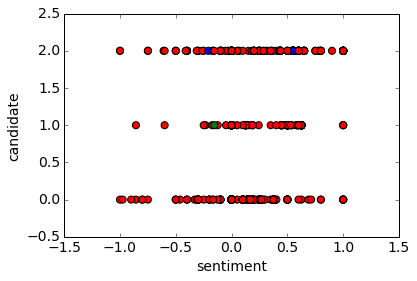

In [443]:
plt.scatter(result.sentiment, result.candidate, c=colors[list(result.cluster)], s=50)
plt.xlabel('sentiment')
plt.ylabel('candidate')

In [68]:
# 7 Explore the clusters
# What is interesting? Surprising? Can you draw any inferences about each cluster?
# Write your answer to these questions in markdown
#The trend that I am seeing is that for all three candidate the sentiment numbers are roughly clustered between -.5 and .5,espacially Hillary's.
#It looks like there are more positive tweets for Bernie and Trump than Hillary.Most of Bernie's tweets are between 0 - 0.5 sentiment.

In [444]:
# 8 Create a column called 'democrat' and assign it to the corresponding candidate name for all the records
# 1 for bernie and hilary and 0 for donald trump
#Aleady exists
result.head()

,date,text,favorite_count,favorited,language,geocode,retweet_count,retweeted,coordinates,candidate,party,word count,cluster,sentiment
0,2016-05-14 04:11:34,RT @tigerbeat: Also #DonaldTrump or #TedCruz w...,0,False,en,None,1,False,None,2,0,135,0,0.000000
1,2016-05-14 03:32:48,@stratosathens @Merlyn43 @realDonaldTrump Also...,0,False,en,None,0,False,None,2,0,108,0,0.550000
2,2016-05-14 02:15:09,"If you look at #Trump Tower on Instagram, it i...",0,False,en,None,0,False,None,2,0,135,0,0.433333
3,2016-05-14 02:10:33,Maybe #DonaldTrump didn't grudge rape #IvanaTr...,1,False,en,None,0,False,None,2,0,143,0,0.000000
4,2016-05-14 02:00:18,"Oh no, #DonaldTrump didnt! And what is the w...",0,False,en,None,0,False,None,2,0,90,0,0.000000


In [ ]:
# 9 Estimate classification models using knn and logistic regession.  Dont forget to use cross validation 
    # (do not use cross_val_score because we will want a confusion matrix).
# Use a three class response variable for knn.  For logistic regression predict democrat or republic?
#Assess the pros and cons of both approaches
#Extra Credit: Estimate multinomial regression model using the three class response variable


In [445]:
from sklearn.neighbors import KNeighborsClassifier

In [446]:
New_dataframe = result.drop(['favorite_count','text','favorited','language', 'geocode','retweeted','date','coordinates','cluster','word count'], axis =1)
New_dataframe.head()

,retweet_count,candidate,party,sentiment
0,1,2,0,0.000000
1,0,2,0,0.550000
2,0,2,0,0.433333
3,0,2,0,0.000000
4,0,2,0,0.000000


In [447]:
#knn
X, y = New_dataframe.drop(['candidate'], axis =1), New_dataframe['candidate']
print X.shape
print y.shape

(997, 3)
(997,)


In [448]:
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [472]:
knn.predict([0,1,0.560000])

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1])

In [461]:
# 10 Initialize a classification model (for both knn and logistic)
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['retweet_count','party']
x = result[feature_cols]
y = result['candidate']


In [462]:
result.columns

Index([u'date', u'text', u'favorite_count', u'favorited', u'language',
       u'geocode', u'retweet_count', u'retweeted', u'coordinates',
       u'candidate', u'party', u'word count', u'cluster', u'sentiment'],
      dtype='object')

In [463]:
# 11 Train your classification model  (for both knn and logistic)
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y)
print x_test.shape

(250, 2)


In [464]:
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)   
zip(feature_cols, logreg.coef_[0])

[('retweet_count', -0.013872535421787289), ('party', 3.4173856622140262)]

In [ ]:
# 12 Predict on your test features and targets (for both knn and logistic)

In [466]:
#Null Accuracy
1/3.

0.3333333333333333

In [465]:
# 13 output your accuracy (for both knn and logistic)
x_test.shape
logreg.score(x_test, y_test)

0.67200000000000004

In [469]:
# 14 Create a confusion matrix for your predictions (for both knn and logistic)
from sklearn import metrics
preds = logreg.predict(x_test)
print preds
print metrics.confusion_matrix(y_test, preds)

[1 2 2 2 1 0 2 1 0 2 0 0 2 2 0 2 2 2 2 0 2 0 0 2 0 0 2 2 0 2 0 0 1 1 0 1 2
 0 2 1 0 0 2 0 0 1 1 1 1 2 2 2 2 0 2 2 1 2 2 0 0 0 2 2 2 2 2 0 0 0 0 0 2 2
 0 0 0 2 2 1 0 0 0 0 0 2 0 0 2 1 2 2 2 2 2 2 0 1 2 2 0 0 2 0 2 2 2 0 1 1 1
 0 0 2 2 1 2 2 0 2 2 0 2 1 0 0 1 0 2 0 2 2 2 0 1 0 2 0 0 0 2 2 0 0 0 0 2 0
 2 2 0 1 2 0 2 2 2 0 2 0 0 0 1 1 0 0 2 0 2 2 2 0 1 0 0 0 2 1 2 0 0 2 2 0 0
 2 2 0 0 0 2 0 0 0 2 2 0 1 1 0 0 1 0 2 0 2 1 1 2 2 0 0 2 2 2 0 0 0 2 1 0 0
 1 2 2 0 2 2 0 2 0 1 0 0 2 0 2 2 0 2 0 2 0 1 2 0 2 0 0 0]
[[ 49  22   0]
 [ 60  14   0]
 [  0   0 105]]


In [ ]:
# 15 Who is the easiest candidate to predict? Why do you think? Who is the hardest? Why do you think?
# Write your answers in markdown (for both knn and logistic)
#Trump, because he is the only Republican. So, if the model has the party affiliation, it automatically rules out the other two.Other than that, it is pretty much the same.

In [ ]:
# 16 What are some extra features (data points) you would like to add to this data set. Explain in markdown.
# (hint maybe something like a boolean, "has_hashtag")
#I would like to look at the actual content of the tweets.

In [ ]:
# 17 Try adding extra features to improve the quality of your predictions (for both knn and logistic)